Diabetes Database Analysis
===

> This is an analysis of the data at [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).

# 1. Download Data and read into a Dataframe

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import jedi  # junyper notebook
ip = get_ipython()  # Get the IPython instance
ip.Completer.use_jedi = True

import kagglehub
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")  # Download the database (diabetes.csv)

import shutil
path = shutil.move(path + "\\diabetes.csv", ".")  # Move to working root folder
print(path)

dda_df = pd.read_csv(path)  # Read into a new dataframe

.\diabetes.csv


# 2. Initial Data Inspection
> The initial inspection shows a fairly clean data set, except:

        1. Values of '0.0' appear to indicate missing values.
        2. max of Pregancies, SkinThickness, Insulin and DiabetesPedigreeFunction appear to be well above their respective means.

In [34]:
print("General Info:\n__________________")
print(dda_df.info())
print("\nFirst 10 rows:\n__________________")
print(dda_df.head(10))
print("\nLast 10 rows:\n__________________")
print(dda_df.tail(10))
print("\n10 random rows:\n__________________")
print(dda_df.sample(10))
print("\nColumn null counts:\n__________________")
print(dda_df.isnull().sum())
print("\nRows with null(s):\n__________________")
print(dda_df.columns[dda_df.isnull().any()].tolist())
print("\nData summary:\n__________________")
print(dda_df.describe())

General Info:
__________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

First 10 rows:
__________________
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85

# 3. Data Cleaning
> Setting the 0.0 values to NaN will exclude them from aggregate functions performed on any columns.

In [39]:

dda_df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = dda_df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

> There appears to be at least 374 rows containing missing data, with insulin being the highest.

In [41]:
print(dda_df.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


> Any sampling appear to indicate that any rows containing nan will have Insulin as Nan

In [44]:
print(dda_df[dda_df.isnull().any(axis=1)].sample(20))

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
571            2    130.0           96.0            NaN      NaN  22.6   
401            6    137.0           61.0            NaN      NaN  24.2   
491            2     89.0           90.0           30.0      NaN  33.5   
453            2    119.0            NaN            NaN      NaN  19.6   
580            0    151.0           90.0           46.0      NaN  42.1   
660           10    162.0           84.0            NaN      NaN  27.7   
332            1    180.0            NaN            NaN      NaN  43.3   
632            2    111.0           60.0            NaN      NaN  26.2   
89             1    107.0           68.0           19.0      NaN  26.5   
253            0     86.0           68.0           32.0      NaN  35.8   
438            1     97.0           70.0           15.0      NaN  18.2   
202            0    108.0           68.0           20.0      NaN  27.3   
531            0    107.0           76

> Delete any rows missing data for this analysis.

In [49]:
dda_df = dda_df.loc[~dda_df.isnull().any(axis=1)]  # "~" inverts the truth series

# 4. Outcome Analysis
> Plot each feature against the outcome to discern partial relationships

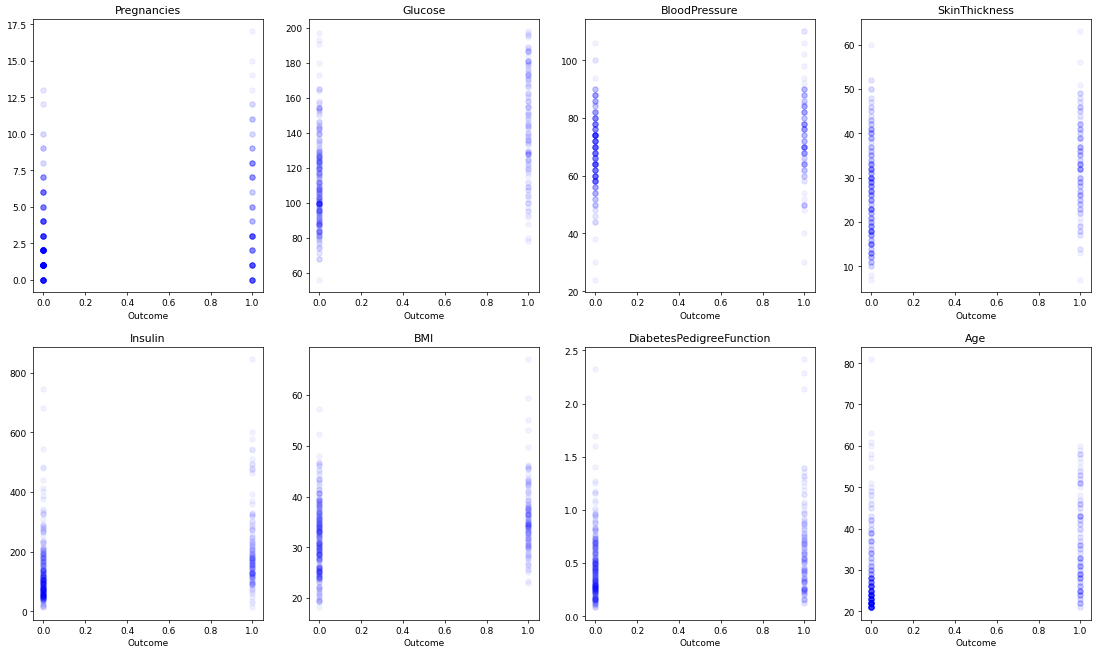

In [62]:
plt.close("all")  # Close all figures
plt.rcParams['figure.figsize'] = (21, 12)
plt.rcParams['figure.dpi'] = 65
output = plt.ioff()
fig, ax = plt.subplots(2,4)

for i in range(0, 8):
    x = i // 4  # Row index
    y = i % 4   # Column index
    ax[x][y].scatter(dda_df.iloc[:, 8], dda_df.iloc[:, i], color='blue', alpha=0.05)
    ax[x][y].set(title=dda_df.columns[i], ylabel="", xlabel="Outcome")

plt.show(1)